<a href="https://colab.research.google.com/github/rick1270/Clayton_DS1_Projects/blob/master/Copy_of_Clayton_DS1_Project1_CA_Water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Action Plan
#### Phase One
1.  Develop Hypothesis regarding water quality 
2.  Research parameters, set forth by the EPA determin their relevance and availibility.  Choose aproximately 12 parameters (drop 2 if needed) and number of water plants

3.  Establish time frame and data points for project

#### Phase Two
1.  Download data from state
2.  Review data (shape, discription, headers)
3.  Determin frequency and distribution of missing data
4.  Address missing data

#### Phase Three
1.  Produce  plot consisting of state of California, data collection points, colors indicating water component levels, with two sliders for year and component.
2.  Produce line graph showing five largest cities in CA and change in each component over time frame


In [129]:
!apt install proj-bin libproj-dev libgeos-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [130]:
!pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz

     | 165.5MB 20.1MB/s
  Running setup.py bdist_wheel for basemap ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done
  Stored in directory: /tmp/pip-ephem-wheel-cache-arctge3i/wheels/6c/c2/bd/d6fb8f2660e0591d357352aba1b117b3211d016994d933d792
Successfully built basemap


In [131]:
! pip install git+https://github.com/anntzer/mplcursors

  Cloning https://github.com/anntzer/mplcursors to /tmp/pip-req-build-fse94v6d
  Running setup.py bdist_wheel for mplcursors ... - done
  Stored in directory: /tmp/pip-ephem-wheel-cache-kgg7s7bk/wheels/96/31/13/6a044169fec7a9aede6380379640d7ecff720c5dc8606e65bf
Successfully built mplcursors


In [0]:
#import libraries here
%matplotlib inline
import mplcursors
from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [0]:
#Eliminate ... in panda outputpd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:

#Import Raw Data
CA_Water_Path = 'https://data.cnra.ca.gov/dataset/3f96977e-2597-4baa-8c9b-c433cea0685e/resource/a9e7ef50-54c3-4031-8e44-aa46f3c660fe/download/lab-results.csv'
df = pd.read_csv(CA_Water_Path)

In [135]:
#View Raw Data
df.head(500)

,STATION_ID,STATION_NAME,FULL_STATION_NAME,STATION_NUMBER,STATION_TYPE,LATITUDE,LONGITUDE,COUNTY_NAME,SAMPLE_CODE,SAMPLE_DATE,SAMPLE_DEPTH,SAMPLE_DEPTH_UNITS,PARAMETER,RESULT,REPORTING_LIMIT,UNITS,METHOD_NAME
0,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.562,Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Conductance,3480.00,1.000,uS/cm,EPA 120.1
1,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.562,Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Dissolved Boron,7.70,0.100,mg/L,"Std Method 4500-B, C"
2,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.562,Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Dissolved Calcium,68.00,1.000,mg/L,EPA 215.2
3,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.562,Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Dissolved Chloride,758.00,0.100,mg/L,"Std Method 4500-Cl, B"
4,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.562,Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Dissolved Magnesium,59.00,0.100,mg/L,"Std Method 3500-Mg, E"
5,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.562,Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Dissolved Sodium,510.00,1.000,mg/L,"Std Method 3500-Na, D"
6,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.562,Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Total Alkalinity,270.00,1.000,mg/L as CaCO3,EPA 310.1
7,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.562,Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Total Hardness,412.00,1.000,mg/L as CaCO3,EPA 130.2
8,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.562,Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,pH,8.00,0.100,pH Units,EPA 150.1
9,8166,01S04W04A001M,01S04W04A001M,01S04W04A001M,Groundwater,37.8788,-122.303,Alameda,WDIS_0744257,07/18/1975 09:50,NaN,Feet,Conductance,1430.00,1.000,uS/cm,EPA 120.1


In [136]:
#Separate out surface water information
sw = df[df['STATION_TYPE'] == 'Surface Water']
#check Data types
sw.dtypes

STATION_ID              int64
STATION_NAME           object
FULL_STATION_NAME      object
STATION_NUMBER         object
STATION_TYPE           object
LATITUDE              float64
LONGITUDE             float64
COUNTY_NAME            object
SAMPLE_CODE            object
SAMPLE_DATE            object
SAMPLE_DEPTH          float64
SAMPLE_DEPTH_UNITS     object
PARAMETER              object
RESULT                float64
REPORTING_LIMIT       float64
UNITS                  object
METHOD_NAME            object
dtype: object

In [137]:
#View data parameters
sw.describe()

,STATION_ID,LATITUDE,LONGITUDE,SAMPLE_DEPTH,RESULT,REPORTING_LIMIT
count,2.383690e+06,2.383690e+06,2.383690e+06,1.378686e+06,2.364666e+06,2.375727e+06
mean,8.293433e+03,3.766743e+01,-1.207869e+02,3.276337e+00,1.489256e+02,6.443835e-01
std,1.518463e+04,2.220881e+00,1.895890e+00,1.596003e+01,5.371261e+03,3.227748e+00
min,1.000000e+00,3.254170e+01,-1.244010e+02,-3.500000e-01,0.000000e+00,0.000000e+00
25%,3.970000e+02,3.639060e+01,-1.218200e+02,1.500000e-01,2.000000e-03,5.000000e-02
50%,2.388000e+03,3.797820e+01,-1.215190e+02,1.000000e+00,2.000000e+00,1.000000e-01
75%,5.541000e+03,3.922570e+01,-1.199770e+02,1.000000e+00,3.100000e+01,1.000000e+00
max,4.783800e+04,4.199850e+01,-1.141360e+02,5.490000e+02,5.000000e+06,1.360000e+03


In [138]:
#Convert SAMPLE_DATE Col from string to time value 
sw['SAMPLE_DATE'] = pd.to_datetime(sw['SAMPLE_DATE'], infer_datetime_format = True)
#Convert SAMPLE_DATE Col to year only (converted back to int?... leave as int)
sw['SAMPLE_DATE'] = sw['SAMPLE_DATE'].dt.year
sw.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,STATION_ID,STATION_NAME,FULL_STATION_NAME,STATION_NUMBER,STATION_TYPE,LATITUDE,LONGITUDE,COUNTY_NAME,SAMPLE_CODE,SAMPLE_DATE,SAMPLE_DEPTH,SAMPLE_DEPTH_UNITS,PARAMETER,RESULT,REPORTING_LIMIT,UNITS,METHOD_NAME
11481,2932,BRUSHY C TRIB A DYER,BRUSHY C TRIB A DYER RD-BRUSHY C,B8933210,Surface Water,37.7672,-121.675,Alameda,WDIS_0897433,1958,NaN,Feet,Conductance,1030.0,1.0,uS/cm,EPA 120.1
11482,2932,BRUSHY C TRIB A DYER,BRUSHY C TRIB A DYER RD-BRUSHY C,B8933210,Surface Water,37.7672,-121.675,Alameda,WDIS_0897433,1958,NaN,Feet,Dissolved Boron,1.7,0.1,mg/L,UnkH Boron
11483,2932,BRUSHY C TRIB A DYER,BRUSHY C TRIB A DYER RD-BRUSHY C,B8933210,Surface Water,37.7672,-121.675,Alameda,WDIS_0897433,1958,NaN,Feet,Dissolved Calcium,51.0,1.0,mg/L,EPA 215.2
11484,2932,BRUSHY C TRIB A DYER,BRUSHY C TRIB A DYER RD-BRUSHY C,B8933210,Surface Water,37.7672,-121.675,Alameda,WDIS_0897433,1958,NaN,Feet,Dissolved Chloride,100.0,0.1,mg/L,"Std Method 4500-Cl, B"
11485,2932,BRUSHY C TRIB A DYER,BRUSHY C TRIB A DYER RD-BRUSHY C,B8933210,Surface Water,37.7672,-121.675,Alameda,WDIS_0897433,1958,NaN,Feet,Dissolved Fluoride,1.4,0.1,mg/L,Std Method 10th Ed Fluororide


In [139]:
#Verify data types
sw.dtypes

STATION_ID              int64
STATION_NAME           object
FULL_STATION_NAME      object
STATION_NUMBER         object
STATION_TYPE           object
LATITUDE              float64
LONGITUDE             float64
COUNTY_NAME            object
SAMPLE_CODE            object
SAMPLE_DATE             int64
SAMPLE_DEPTH          float64
SAMPLE_DEPTH_UNITS     object
PARAMETER              object
RESULT                float64
REPORTING_LIMIT       float64
UNITS                  object
METHOD_NAME            object
dtype: object

In [140]:
#Remove unecessary columns
sw.drop(columns=['STATION_NAME', 'STATION_TYPE', 'STATION_NUMBER', 'SAMPLE_CODE', 'SAMPLE_DEPTH', 'SAMPLE_DEPTH_UNITS', 'METHOD_NAME'], inplace = True)
sw.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,STATION_ID,FULL_STATION_NAME,LATITUDE,LONGITUDE,COUNTY_NAME,SAMPLE_DATE,PARAMETER,RESULT,REPORTING_LIMIT,UNITS
11481,2932,BRUSHY C TRIB A DYER RD-BRUSHY C,37.7672,-121.675,Alameda,1958,Conductance,1030.0,1.0,uS/cm
11482,2932,BRUSHY C TRIB A DYER RD-BRUSHY C,37.7672,-121.675,Alameda,1958,Dissolved Boron,1.7,0.1,mg/L
11483,2932,BRUSHY C TRIB A DYER RD-BRUSHY C,37.7672,-121.675,Alameda,1958,Dissolved Calcium,51.0,1.0,mg/L
11484,2932,BRUSHY C TRIB A DYER RD-BRUSHY C,37.7672,-121.675,Alameda,1958,Dissolved Chloride,100.0,0.1,mg/L
11485,2932,BRUSHY C TRIB A DYER RD-BRUSHY C,37.7672,-121.675,Alameda,1958,Dissolved Fluoride,1.4,0.1,mg/L


In [141]:
#Check for missing values
sw['COUNTY_NAME'].isnull().sum()

0

In [142]:
#Check number of unique values in each column... keep long and lat for possible map display
sw.nunique() 

STATION_ID            4978
FULL_STATION_NAME     4922
LATITUDE              4343
LONGITUDE             3007
COUNTY_NAME             58
SAMPLE_DATE             97
PARAMETER              386
RESULT               10478
REPORTING_LIMIT        402
UNITS                   30
dtype: int64

In [143]:
#Count and pare down list of FSN
fsn_vc = pd.value_counts(df['FULL_STATION_NAME'])
fsn_list = fsn_vc.index.tolist()
fsn_list = ['North Bay Aqueduct at Barker Slough Pumping Plant', 'CALIFORNIA AQU NR KETTLEMAN CK-21', 'CALIFORNIA AQU A CHECK 29', 'DMC@McCabe Rd Nr. Check 12, mi.67.16', 'California Aqueduct at Devil Canyon Afterbay']
fsn_list


['North Bay Aqueduct at Barker Slough Pumping Plant',
 'CALIFORNIA AQU NR KETTLEMAN CK-21',
 'CALIFORNIA AQU A CHECK 29',
 'DMC@McCabe Rd Nr. Check 12, mi.67.16',
 'California Aqueduct at Devil Canyon Afterbay']

In [144]:
fsn_vc

Delta P.P. Headworks at H.O. Banks PP                 53639
North Bay Aqueduct at Barker Slough Pumping Plant     42147
CALIFORNIA AQU NR KETTLEMAN CK-21                     34448
CA Aqueduct, Ck 13, O'Neill Outlet                    33983
San Joaquin River near Vernalis - C10                 32682
CALIFORNIA AQU A CHECK 29                             29341
CALIFORNIA AQUEDUCT AT CHECK 41                       28333
Clifton Court Intake                                  22993
Castaic Lake Outlet Tower                             22505
Silverwood Lk Outlet Tower (San Bernardino Tunnel)    20691
DMC@McCabe Rd Nr. Check 12, mi.67.16                  20225
PYRAMID LK A ANGELES Tunnel INtake Outlet             19516
South Bay Aqueduct Del Valle Check 7                  19510
Lake Del Valle at Glory Hole                          19146
California Aqueduct at Devil Canyon Afterbay          16575
CALIFORNIA AQU A INL TO MOJAVE SI                     15986
THERMALITO AFTERBAY A FEATHER R         

In [145]:
parameter_vc = pd.value_counts(df['PARAMETER'])
parameter_vc.head(20)

Dissolved Chloride           264210
Total Alkalinity             233380
Conductance                  230571
pH                           225842
Dissolved Sodium             224534
Dissolved Calcium            200629
Dissolved Magnesium          198942
Dissolved Sulfate            190650
Total Hardness               181615
Dissolved Boron              178460
Total Dissolved Solids       178443
Dissolved Nitrate            165742
Dissolved Potassium          159312
Dissolved Fluoride           107142
Turbidity                     90964
Dissolved Silica (SiO2)       73878
Dissolved Ortho-phosphate     57517
Total Phosphorus              53695
Dissolved Hardness            50729
Total Kjeldahl Nitrogen       40142
Name: PARAMETER, dtype: int64

In [146]:
#list total number of measurements for each water parameter
parameter_vc = pd.value_counts(df['PARAMETER'])
parameter_list = parameter_vc.index.tolist()
parameter_list = parameter_list[0:1] + parameter_list[3:8] + parameter_list[10:14]
parameter_list


['Dissolved Chloride',
 'pH',
 'Dissolved Sodium',
 'Dissolved Calcium',
 'Dissolved Magnesium',
 'Dissolved Sulfate',
 'Total Dissolved Solids',
 'Dissolved Nitrate',
 'Dissolved Potassium',
 'Dissolved Fluoride']

In [147]:
#Check size of df
sw.shape

(2383690, 10)

In [148]:
#Test dynamic date range... most recent to 30 years back
years = list(range(max(sw['SAMPLE_DATE'])-30, max(sw['SAMPLE_DATE'])))
years

[1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

In [149]:

#Create and view new project data
site_data = (sw.loc[sw['FULL_STATION_NAME'].isin(fsn_list)])
year_data = (site_data.loc[site_data['SAMPLE_DATE'].isin(years)])
target_data = (year_data.loc[year_data['PARAMETER'].isin(parameter_list)])
target_data



,STATION_ID,FULL_STATION_NAME,LATITUDE,LONGITUDE,COUNTY_NAME,SAMPLE_DATE,PARAMETER,RESULT,REPORTING_LIMIT,UNITS
926337,347,CALIFORNIA AQU A CHECK 29,35.2320,-119.330,Kern,1995,Dissolved Calcium,31.00,1.00,mg/L
926338,347,CALIFORNIA AQU A CHECK 29,35.2320,-119.330,Kern,1995,Dissolved Chloride,95.00,1.00,mg/L
926341,347,CALIFORNIA AQU A CHECK 29,35.2320,-119.330,Kern,1995,Dissolved Fluoride,0.10,0.10,mg/L
926345,347,CALIFORNIA AQU A CHECK 29,35.2320,-119.330,Kern,1995,Dissolved Magnesium,14.00,1.00,mg/L
926350,347,CALIFORNIA AQU A CHECK 29,35.2320,-119.330,Kern,1995,Dissolved Sodium,92.00,1.00,mg/L
926351,347,CALIFORNIA AQU A CHECK 29,35.2320,-119.330,Kern,1995,Dissolved Sulfate,101.00,1.00,mg/L
926354,347,CALIFORNIA AQU A CHECK 29,35.2320,-119.330,Kern,1995,Total Dissolved Solids,406.00,0.10,mg/L at 180 deg C
926355,347,CALIFORNIA AQU A CHECK 29,35.2320,-119.330,Kern,1995,pH,7.90,0.10,pH Units
926358,347,CALIFORNIA AQU A CHECK 29,35.2320,-119.330,Kern,2013,Dissolved Chloride,87.00,1.00,mg/L
926360,347,CALIFORNIA AQU A CHECK 29,35.2320,-119.330,Kern,2013,Dissolved Nitrate,4.50,0.10,mg/L


In [150]:
LL = target_data[['FULL_STATION_NAME', 'LONGITUDE', 'LATITUDE']]
LL = LL.drop_duplicates()
LL = LL.replace(np.nan, 'No Name', regex=True)
LL.isnull().sum()

FULL_STATION_NAME    0
LONGITUDE            0
LATITUDE             0
dtype: int64

In [151]:
LL

,FULL_STATION_NAME,LONGITUDE,LATITUDE
926337,CALIFORNIA AQU A CHECK 29,-119.330,35.2320
1051711,CALIFORNIA AQU NR KETTLEMAN CK-21,-119.977,36.0142
1847546,"DMC@McCabe Rd Nr. Check 12, mi.67.16",-121.039,37.1269
2818751,California Aqueduct at Devil Canyon Afterbay,-117.335,34.2011
3672463,North Bay Aqueduct at Barker Slough Pumping Plant,-121.796,38.2759


In [152]:
lon_list = LL['LONGITUDE'].tolist()
lon_list

[-119.33, -119.977, -121.039, -117.335, -121.796]

In [153]:
lat_list = LL['LONGITUDE'].tolist()
lat_list

[-119.33, -119.977, -121.039, -117.335, -121.796]

In [154]:
#assess size of new data
LL.shape

(5, 3)

In [155]:
#Observe amount of data for each contaminent
pd.value_counts(target_data['PARAMETER']).sort_index()

Dissolved Calcium         1677
Dissolved Chloride        1723
Dissolved Fluoride        1126
Dissolved Magnesium       1676
Dissolved Nitrate          951
Dissolved Potassium        170
Dissolved Sodium          1695
Dissolved Sulfate         1739
Total Dissolved Solids    1862
pH                        1651
Name: PARAMETER, dtype: int64

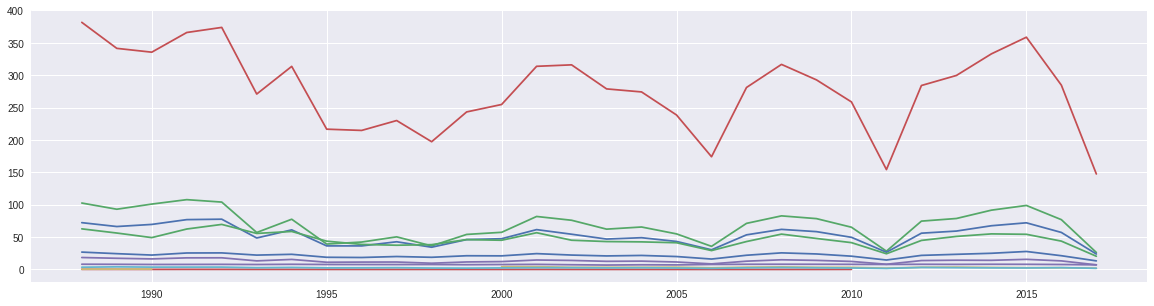

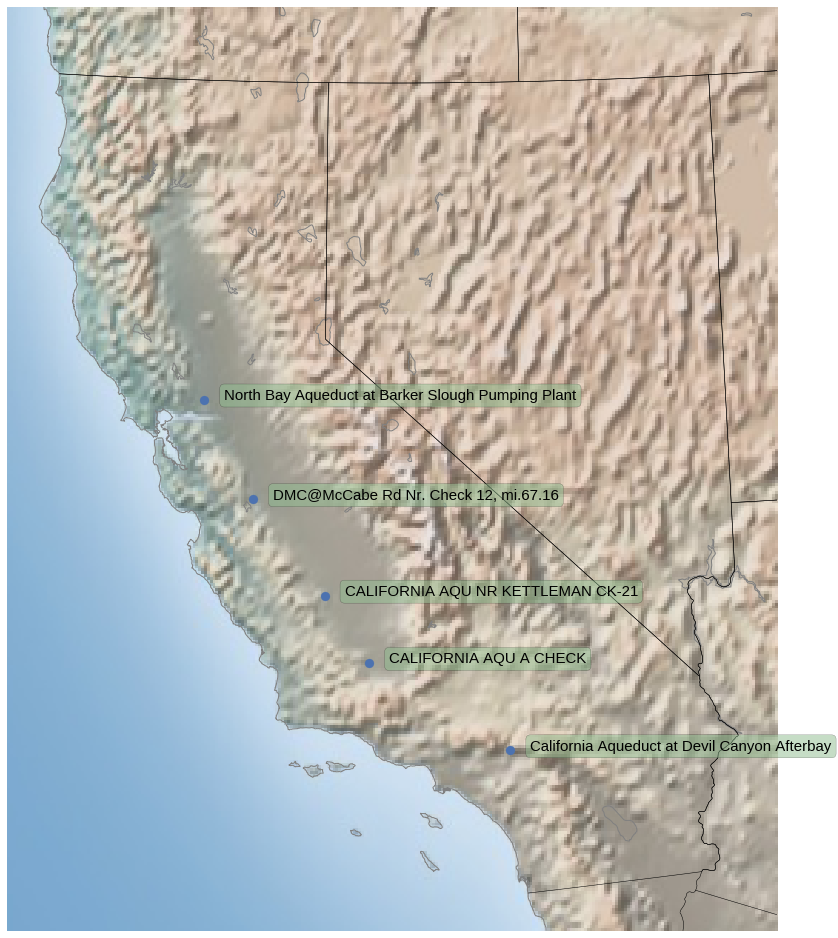

In [164]:
lat = LL['LATITUDE'].values
lon = LL['LONGITUDE'].values
fig = plt.figure(figsize=(17, 17))
ax = plt.axes()
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='black')
m.drawstates(color='black')
m.scatter(lon, lat, latlon= True, s= 80);
#Label each point
labels = fsn_list
props = dict(boxstyle='round', facecolor='darkseagreen', alpha=0.5)
ax.annotate("CALIFORNIA AQU A CHECK", m(-119.330, 35.2320),color='black', fontsize = 15, bbox = props, xytext=(20, 0), textcoords='offset pixels')
ax.annotate("CALIFORNIA AQU NR KETTLEMAN CK-21", m(-119.977, 36.0142),color='black', fontsize = 15, bbox = props, xytext=(20, 0), textcoords='offset pixels')
ax.annotate("DMC@McCabe Rd Nr. Check 12, mi.67.16", m(-121.039, 37.1269),color='black', fontsize = 15, bbox = props, xytext=(20, 0), textcoords='offset pixels')
ax.annotate("California Aqueduct at Devil Canyon Afterbay", m(-117.335, 34.2011), color='black', fontsize = 15, bbox = props, xytext=(20, 0), textcoords='offset pixels')
ax.annotate("North Bay Aqueduct at Barker Slough Pumping Plant", m(-121.796, 38.2759),color='black', fontsize = 15, bbox = props, xytext=(20, 0), textcoords='offset pixels');

Station = "California Aqueduct at Devil Canyon Afterbay" #@param ["North Bay Aqueduct at Barker Slough Pumping Plant", "CALIFORNIA AQU NR KETTLEMAN CK-21", "CALIFORNIA AQU A CHECK 29", "DMC@McCabe Rd Nr. Check 12, mi.67.16", "California Aqueduct at Devil Canyon Afterbay"]
Parameter = "Dissolved Magnesium" #@param ["Dissolved Calcium", "Dissolved Chloride", "Dissolved Fluoride", "Dissolved Magnesium", "Dissolved Nitrate", "Dissolved Potassium", "Dissolved Sodium", "Dissolved Sulfate", "Total Dissolved Solids"]


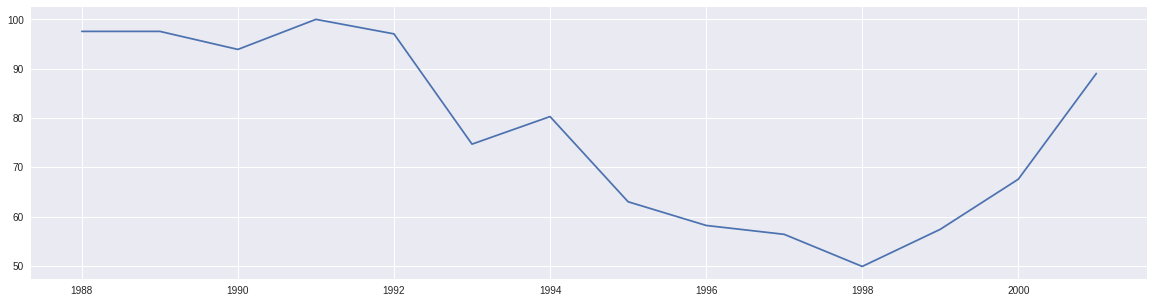

In [179]:

#= pd.crosstab(target_data['SAMPLE_DATE'], target_data['PARAMETER'], values = target_data['RESULT'], aggfunc=[np.mean])
#
#state_data['Turbidity'] = (state_data['Turbidity']/max(state_data['Turbidity']))*100
#state_data['pH'] = 100 - (((state_data['pH']-min(state_data['pH']))/min(state_data['pH']))*100)

#state_data

variable_data1 = target_data[target_data['FULL_STATION_NAME'] == Station]
variable_data2 = variable_data1[variable_data1['PARAMETER'] == Parameter]
pdata= pd.crosstab(variable_data2['SAMPLE_DATE'], variable_data2['PARAMETER'], values = variable_data2['RESULT'], aggfunc=[np.mean])
pdata.columns = [Parameter]
pdata[Parameter] = (pdata[Parameter]/max(pdata[Parameter]))*100
fig = plt.figure(figsize = (20,5))
plt.plot(pdata);








